### First of all, we import some usefull libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
import scipy as sc
from mpl_toolkits.mplot3d import Axes3D
import time as time

We initializate the temporary counter and define next parameters.

In [2]:
t0 = time.perf_counter()
s = -25.
n = 6
a = 5

We define next bessel functions, as well as some initial ranges and parameters.

In [3]:
def pass_to_dB(function):
    return 10 * np.log10(function / np.max(function))

def clear_around(function):
    #function[np.where(function > np.pi / 2)] = - 50
    function[np.where(function < - 50)] = - 50

def degrees(angle):
    return 180 * angle / np.pi

def radians(angle):
    return np.pi * angle / 180

rho_a = np.arange(0, 1, 0.001)
rho_a = np.delete(rho_a, 0)

c = np.arange(0, 25, 0.001)
c = np.delete(c, 0)
zeros = sc.special.jn_zeros(1, n + 5) / np.pi

In [4]:
# Complexo.
u_i = np.array([0.5967, 1.7837, 3.6420, 4.3039, 5.2119])
v_i = np.array([0.5225, 0.5268, 0, 0, 0])

# Real.
u_r = np.array([1.0225, 3.0445, 5.4319, 6.1570, 7.1293])
v_r = np.array([1.1424, 1.0829, 0, 0, 0])

def delta_complex_roots(u, u_roots, v_roots):
    h_1 = 1
    h_2 = 1
    h_f = 1
    for j in np.arange(0, n - 1):
        h_1 *= u_roots[j]**4 + v_roots[j]**4 + u**4 + 2 * u_roots[j]**2 * v_roots[j]**2 + 2 * u**2 * (v_roots[j]**2 - u_roots[j]**2)
        h_2 *= u_roots[j]**2 + v_roots[j]**2
        h_f *= 1 - (u / zeros[j])**2
    return (2 * sc.special.j1(np.pi * u) / (h_f * np.pi * u))**2 * h_1 / h_2**2

def delta_real_roots(u, u_roots, v_roots):
    h_1 = 1
    h_2 = 1
    h_f = 1
    M = np.count_nonzero(v_roots)
    for j in np.arange(0, M):
        h_1 *= u_roots[j]**4 + v_roots[j]**4 + u**4 + 2 * u_roots[j]**2 * v_roots[j]**2 + 2 * u**2 * (v_roots[j]**2 - u_roots[j]**2)
        h_2 *= u_roots[j]**2 + v_roots[j]**2
    
    for j in np.arange(M, n - 1):
        h_1 *= u_roots[j]**2 - u**2
        h_2 *= u_roots[j]**2
    
    for j in np.arange(0, n + M - 1):
        h_f *= 1 - (u / zeros[j])**2
    return ((2 * sc.special.j1(np.pi * u) * h_1) / (h_f * h_2 * np.pi * u))**2

In [5]:
complex_roots = np.zeros(len(c))
real_roots = np.zeros(len(c))

for i in range(len(c)):
    u = 2 * a * np.sin(c[i])
    complex_roots[i] = np.abs(delta_complex_roots(u, u_i, v_i))
    real_roots[i] = np.abs(delta_real_roots(u, u_r, v_r))

complex_roots = pass_to_dB(complex_roots)
real_roots = pass_to_dB(real_roots)

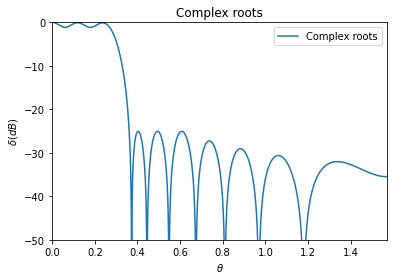

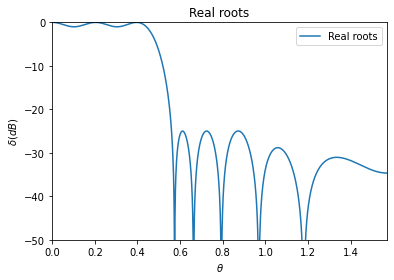

In [6]:
plt.figure(1)
plt.plot(c, complex_roots, label = u'Complex roots')
plt.title('Complex roots')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\delta (dB)$')
plt.xlim(0, np.pi / 2)
plt.ylim(-50, 0)
plt.savefig('1D_complex_pattern.png', dpi = 300)

plt.figure(2)
plt.plot(c, real_roots, label = u'Real roots')
plt.title('Real roots')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\delta (dB)$')
plt.xlim(0, np.pi / 2)
plt.ylim(-50, 0)
plt.savefig('1D_real_pattern.png', dpi = 300)
plt.show()

## 3D plotting

$0.1 \to 0.0005$

In [7]:
x = np.arange(- np.pi / 2, np.pi / 2, 0.001); x = np.delete(x, np.where(x == 0))
X, Y = np.meshgrid(x, x)

X_plot = np.sin(X)
Y_plot = np.sin(Y)

N = len(x)
N_square = N * N

theta = np.sqrt(X**2 + Y**2)
phi = np.arctan2(Y, X)

Theta = np.reshape(theta, (N_square))
Phi = np.reshape(phi, (N_square))

while np.count_nonzero(np.abs(Phi) > np.pi / 4) != 0:
    Phi[np.where(Phi > np.pi / 4)] -= np.pi / 2
    Phi[np.where(Phi < - np.pi / 4)] += np.pi / 2

In [8]:
Z_complex = np.zeros(N_square)
Z_real = np.zeros(N_square)

Z_complex = np.abs(delta_complex_roots(2 * a * np.sin(Theta) * np.cos(Phi), u_i, v_i))
Z_real = np.abs(delta_real_roots(2 * a * np.sin(Theta) * np.cos(Phi), u_r, v_r))

Z_complex = pass_to_dB(Z_complex)
Z_real = pass_to_dB(Z_real)

clear_around(Z_complex)
clear_around(Z_real)

In [9]:
Z_complex = np.reshape(Z_complex, (N, N))
Z_real = np.reshape(Z_real, (N, N))

#np.savetxt('Z_complex.txt', Z_complex)
#np.savetxt('Z_real.txt', Z_real)

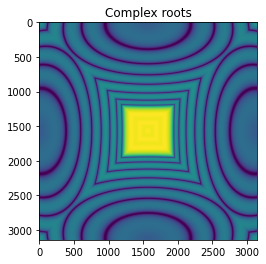

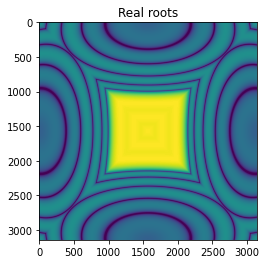

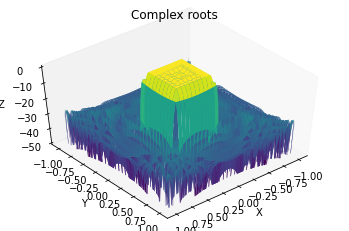

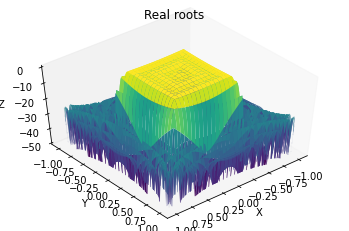

In [10]:
fig = plt.figure(1)
plt.imshow(Z_complex)
plt.title('Complex roots')
plt.savefig('Horizontal_complex_cut.png', dpi = 300)

fig = plt.figure(2)
plt.imshow(Z_real)
plt.title('Real roots')
plt.savefig('Horizontal_real_cut.png', dpi = 300)

fig = plt.figure(3)
ax = plt.axes(projection = '3d')
ax.plot_surface(X_plot, Y_plot, Z_complex, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
ax.set_zlim(-50, 0)
plt.title('Complex roots')
plt.savefig('3D_complex_pattern.png', dpi = 300)
ax.view_init(50, 50)

fig = plt.figure(4)
ax = plt.axes(projection = '3d')
ax.plot_surface(X_plot, Y_plot, Z_real, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
ax.set_zlim(-50, 0)
plt.title('Real roots')
plt.savefig('3D_real_pattern.png', dpi = 300)
ax.view_init(50, 50)

Reproducimos os calculos do Elliot das páxinas $221-225$.

In [11]:
def Taylor_sum_pattern(u, s, n):
    modified_zeros = np.zeros(n + 1)
    A = np.arccosh(10**(- s / 20)) / np.pi
    
    for i in range(n + 1): # Modified zeros.
        modified_zeros[i] = zeros[n - 1] * np.sqrt((A**2 + (i + 0.5)**2) / (A**2 + (n - 0.5)**2))
    
    h_1 = 1
    h_2 = 1
    for j in range(n - 1):
        h_1 *= 1 - (u / modified_zeros[j])**2
        h_2 *= 1 - (u / zeros[j])**2
    
    return (sc.special.jv(1, np.pi * u) * h_1) / (h_2 * np.pi * u)

Xuntamos estas dúas para facer o noso patrón suma de Taylor.

In [12]:
def F_6_70(u, phi, s_a, n_a, s_b, n_b):
    F_a = Taylor_sum_pattern(u, s_a, n_a)
    F_b = Taylor_sum_pattern(u, s_b, n_b)
    if np.abs(phi) <= phi_0:
        aux = np.cos(np.pi * phi / phi_0)
        return 0.5 * (F_a * (1 + aux) + F_b * (1 - aux))
    else:
        return F_b

Definimos os diferentes parámetros usados.

In [13]:
s_a = - 25
n_a = 6

s_b = - 15
n_b = 3

phi_0 = np.pi / 2
l = np.pi / phi_0

Presentamos as gráficas, obtendo os resultados esperados.

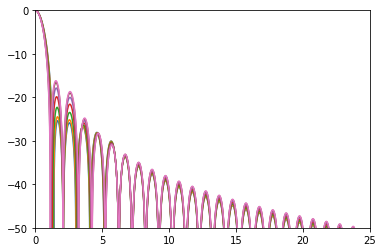

In [14]:
def plot(phi):
    F0 = np.abs(F_6_70(c, phi, s_a, n_a, s_b, n_b))
    F0 = 2 * pass_to_dB(F0)
    plt.plot(c, F0)
    plt.ylim(-50, 0)
    plt.xlim(0, 25)
    #plt.show()

plot(0)
plot(np.pi * 15 / 180)
plot(np.pi * 30 / 180)
plot(np.pi * 45 / 180)
plot(np.pi * 60 / 180)
plot(np.pi * 75 / 180)
plot(np.pi * 90 / 180)

Agora calculamos os coeficientes de Fourier deste patrón de radiación.

In [15]:
def F_k(k, u):
    l_square = l**2
    k_square = k**2
    
    F_a = Taylor_sum_pattern(u, s_a, n_a)
    F_b = Taylor_sum_pattern(u, s_b, n_b)
    
    if k == 0:
        return F_b + 0.5 * (F_a - F_b) / l
    
    elif k_square == l_square:
        return 0.25 * (F_a - F_b) / l
    
    else:
        return (0.5 * (F_a - F_b) * l_square * np.sin(np.pi * k / l)) / ((l_square - k_square) * np.pi * k)

Comprobamos que os coeficientes de Fourier están ben calculador, pois reproducen o anterior pratrón.

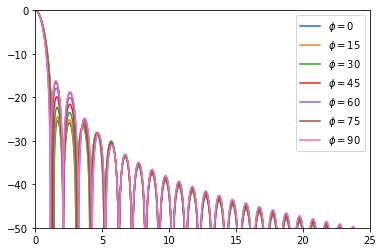

In [16]:
def F_k_comprobation(phi):
    _phi_ = phi * 180 / np.pi
    F_de_ns = 0
    
    for k in np.arange(- 20, 20 + 1):
            F_de_ns += F_k(k, c) * np.exp(1j * k * phi)
    
    F_de_ns = 2 * pass_to_dB(np.abs(F_de_ns))
    plt.plot(c, F_de_ns, label = u'$\phi = %.f$' %_phi_)
    plt.legend(loc = 'best')

F_k_comprobation(0)
F_k_comprobation(np.pi * 15 / 180)
F_k_comprobation(np.pi * 30 / 180)
F_k_comprobation(np.pi * 45 / 180)
F_k_comprobation(np.pi * 60 / 180)
F_k_comprobation(np.pi * 75 / 180)
F_k_comprobation(np.pi * 90 / 180)

plt.ylim(-50, 0)
plt.xlim(0, 25)
plt.show()

Definimos os máximos sumandos nos dous sumatorios a infinito que temos e calculamos en función desto os ceros da función de Bessel.

In [17]:
max_in_sum_1 = 10
max_in_sum_2 = 50
Bessel_zeros = np.zeros((max_in_sum_2 + 1, max_in_sum_1 + 1))

for k in range(max_in_sum_2 + 1):
    Bessel_zeros[k, 1:max_in_sum_1 + 1] = sc.special.jn_zeros(k, max_in_sum_1) / np.pi

Con esto calculamos a función de distribución de apertura (para $n != 0$ e $n = 0$).

In [18]:
# Modificamos a posición dos ceros para evitar indeterminacións.

def g_n(k, p): # Para todo n.
    aux = 0
    
    if k == 0:
        for m in np.arange(0, max_in_sum_1):
            gamma_1m = Bessel_zeros[1, m]
            gamma_1m_mod = gamma_1m - 1e-15
            
            aux += (F_k(0, gamma_1m_mod) * sc.special.jv(0, gamma_1m * p)) / (sc.special.jv(0, gamma_1m * np.pi))**2 
    
    else:
        for m in np.arange(1, max_in_sum_1):
            gamma_nm = Bessel_zeros[np.abs(k), m]
            
            if gamma_nm in Bessel_zeros[1, :]:
                gamma_nm_mod = gamma_nm - 1e-15
            else:
                gamma_nm_mod = gamma_nm
            
            aux -= (F_k(k, gamma_nm_mod) * sc.special.jv(k, gamma_nm * p)) / (sc.special.jv(k - 1, gamma_nm * np.pi) * sc.special.jv(k + 1, gamma_nm * np.pi))
        
    return 2 * aux / np.pi**2

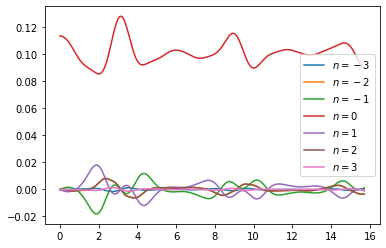

In [19]:
d = c * np.pi / a

for k in np.arange(-3, 4):
    plt.plot(d, g_n(k, d), label = u'$n = %.f$' %k)
    plt.legend(loc = 'best')

Calculamos os coeficientes de Fourier de función de apertura.

In [20]:
def K_n(k, p):
    return g_n(k, np.pi * p / a) * np.pi / (2 * a**2 * (1j)**k)

Con esto reconstruimos a noso apertura.

In [21]:
def K_rho_beta(p, beta): # K_6_45
    aux = 0 + 1j*0
    for k in np.arange(- max_in_sum_2, max_in_sum_2 + 1):
        aux += K_n(k, p) * np.exp(1j * k * beta)
    return aux

Levamos a cabo unha representación da apertura.

In [22]:
def subplot(beta_1, beta_2, function):
    aux_1 = function(rho_a * a, beta_1)
    aux_2 = function(rho_a * a, beta_2)
    
    fig, ax = plt.subplots(2, 2)
    ax[0, 0].plot(rho_a, np.abs(aux_1))
    ax[0, 1].plot(rho_a, np.abs(aux_2))

    ax[1, 0].plot(rho_a, np.angle(aux_1))
    ax[1, 1].plot(rho_a, np.angle(aux_2))
    fig.tight_layout()
    plt.show()

Usamos unha ecuación diferente para calculalo de novo.

In [23]:
def K_6_84(p, beta):
    aux = 0 + 1j*0
    aux += g_n(0, np.pi * p / a) - 2 * np.cos(beta) * g_n(2, np.pi * p / a)
    for k in np.arange(1, max_in_sum_1):
        aux += 2 * (- 1j)**np.abs(k) * np.cos(k * beta) * g_n(k, np.pi * p / a)
    return aux * np.pi / (2 * a**2)

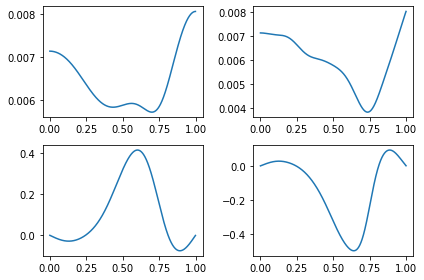

In [24]:
subplot(radians(180), radians(0), K_6_84)

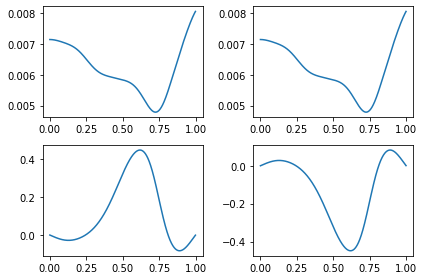

In [25]:
subplot(radians(180), radians(0), K_rho_beta)

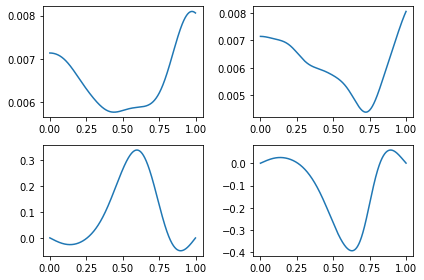

In [26]:
subplot(radians(210), radians(30), K_6_84)

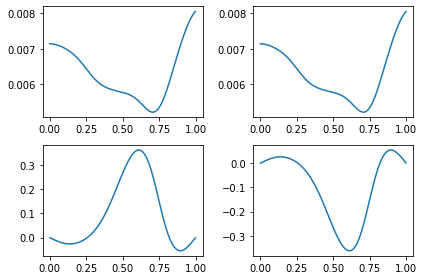

In [27]:
subplot(radians(210), radians(30), K_rho_beta)

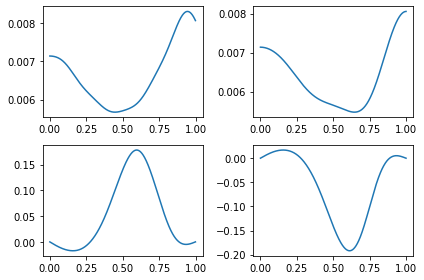

In [28]:
subplot(radians(240), radians(60), K_6_84)

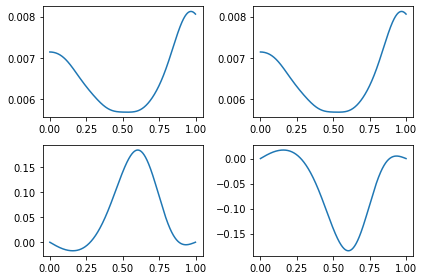

In [29]:
subplot(radians(240), radians(60), K_rho_beta)

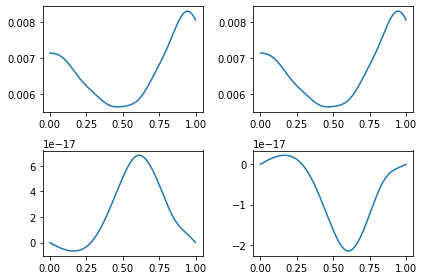

In [30]:
subplot(radians(270), radians(90), K_6_84)

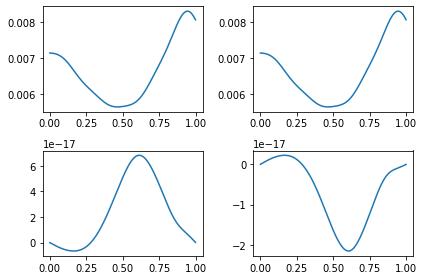

In [31]:
subplot(radians(270), radians(90), K_rho_beta)

In [32]:
print('Total execution time is:', np.round(time.perf_counter() - t0, 2), 's')

Total execution time is: 89.48 s
